2024-10-14 20:14:27.258814: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-14 20:14:27.289401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 20:14:27.289426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 20:14:27.290036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 20:14:27.295152: I tensorflow/core/platform/cpu_feature_guar

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0


2024-10-14 20:14:34.030326: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8231 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:1a:00.0, compute capability: 8.6
2024-10-14 20:14:34.030815: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7838 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:68:00.0, compute capability: 8.6


Starting training: 
Epoch 1/50


2024-10-14 20:14:40.360912: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-10-14 20:14:41.559210: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-14 20:14:41.559307: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


   2/2202 [..............................] - ETA: 3:16 - loss: 5.5113 - accuracy: 0.5781   

2024-10-14 20:14:45.626102: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fed68010690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-14 20:14:45.626163: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-10-14 20:14:45.626175: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-10-14 20:14:45.659011: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1728962085.831894 1849190 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2202/2202 [==============================] - ETA: 0s - loss: 0.2565 - accuracy: 0.9448
Epoch 1: val_loss improved from inf to 0.14327, saving model to ./NewResultsCorrected/best_fusionModelV3OptimizedVGG16.h5


/home/researchgroup/miniconda3/envs/newtest/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2202/2202 [==============================] - 242s 105ms/step - loss: 0.2565 - accuracy: 0.9448 - val_loss: 0.1433 - val_accuracy: 0.9719 - lr: 1.0000e-04
Epoch 2/50
2202/2202 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.9717
Epoch 2: val_loss improved from 0.14327 to 0.14267, saving model to ./NewResultsCorrected/best_fusionModelV3OptimizedVGG16.h5
2202/2202 [==============================] - 229s 104ms/step - loss: 0.1440 - accuracy: 0.9717 - val_loss: 0.1427 - val_accuracy: 0.9721 - lr: 1.0000e-04
Epoch 3/50
2202/2202 [==============================] - ETA: 0s - loss: 0.1198 - accuracy: 0.9766
Epoch 3: val_loss improved from 0.14267 to 0.10160, saving model to ./NewResultsCorrected/best_fusionModelV3OptimizedVGG16.h5
2202/2202 [==============================] - 228s 104ms/step - loss: 0.1198 - accuracy: 0.9766 - val_loss: 0.1016 - val_accuracy: 0.9792 - lr: 1.0000e-04
Epoch 4/50
2202/2202 [==============================] - ETA: 0s - loss: 0.1005 - accuracy:

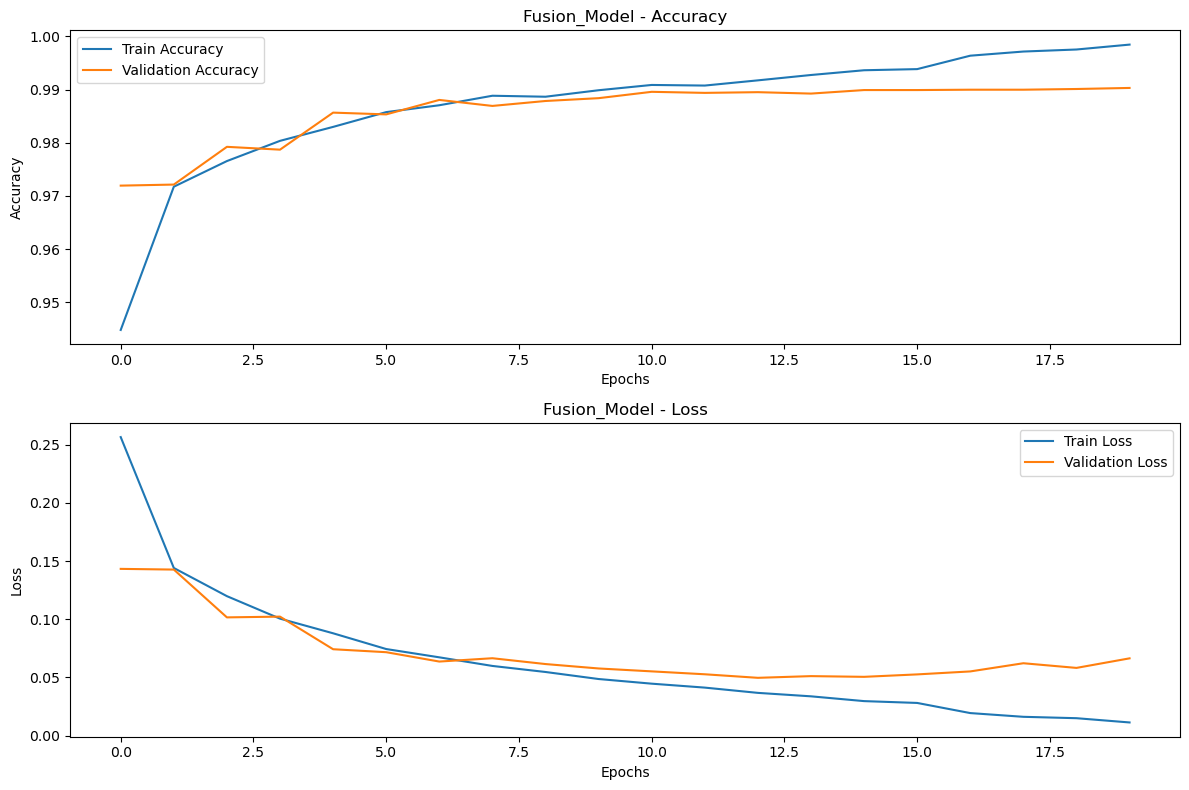

472/472 [==============================] - 13s 27ms/step - loss: 0.0498 - accuracy: 0.9888
Test Loss: 0.0498, Test Accuracy: 0.9888


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# GPU setup
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(e)

# Set mixed precision policy for potential performance gains on supported hardware
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Define directories for the newly created dataset
train_dir = './processed_dataCorrected/full/train'
val_dir = './processed_dataCorrected/full/val'
test_dir = './processed_dataCorrected/full/test'

# Define directory for saving models and results
save_dir = './NewResultsCorrected'
os.makedirs(save_dir, exist_ok=True)

# Data generator for batch loading (remains unchanged)
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_dir, batch_size, scaler=None, shuffle=True):
        """
        Initializes the data generator.
        :param data_dir: Directory containing the data.
        :param batch_size: Batch size.
        :param scaler: Scaler for normalizing 1D data (optional).
        :param shuffle: Whether to shuffle the data after each epoch.
        """
        self.data_dir = data_dir
        self.batch_size = batch_size
        
        # Load the npy files directly from the directory (no subdirectories)
        self.segment_files = [os.path.join(data_dir, 'segments.npy')]
        self.rp_files = [os.path.join(data_dir, 'rp_images.npy')]
        self.gaf_files = [os.path.join(data_dir, 'gaf_images.npy')]
        self.mtf_files = [os.path.join(data_dir, 'mtf_images.npy')]
        self.label_files = [os.path.join(data_dir, 'labels.npy')]

        # Load the data in memory and apply any preprocessing (e.g., scaling) as necessary
        self.X_1D = np.load(self.segment_files[0])
        self.X_rp = np.load(self.rp_files[0])
        self.X_gaf = np.load(self.gaf_files[0])
        self.X_mtf = np.load(self.mtf_files[0])
        self.y = np.load(self.label_files[0])

        # Adjust for one set of files
        self.indexes = np.arange(len(self.X_1D))
        self.scaler = scaler
        if self.scaler:
            self.X_1D = self.scaler.fit_transform(self.X_1D)

        # Ensure that the 1D data is in the correct shape for LSTM (batch_size, time_steps, 1)
        self.X_1D = self.X_1D.reshape((-1, self.X_1D.shape[1], 1))

        # Keep only the first 3 channels of 2D image data (if applicable)
        self.X_rp = self.X_rp[:, :, :, :3]
        self.X_gaf = self.X_gaf[:, :, :, :3]
        self.X_mtf = self.X_mtf[:, :, :, :3]

        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        # Returns the number of batches per epoch
        return int(np.floor(len(self.X_1D) / self.batch_size))
    
    def __getitem__(self, index):
        # Slice the batch based on the batch_size and index
        batch_X_1D = self.X_1D[index * self.batch_size:(index + 1) * self.batch_size]
        batch_X_rp = self.X_rp[index * self.batch_size:(index + 1) * self.batch_size]
        batch_X_gaf = self.X_gaf[index * self.batch_size:(index + 1) * self.batch_size]
        batch_X_mtf = self.X_mtf[index * self.batch_size:(index + 1) * self.batch_size]
        batch_y = self.y[index * self.batch_size:(index + 1) * self.batch_size]

        return [batch_X_1D, [batch_X_rp, batch_X_gaf, batch_X_mtf]], batch_y

    def on_epoch_end(self):
        # Shuffle the data at the end of each epoch
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Initialize the data generators
scaler = StandardScaler()
train_generator = DataGenerator(train_dir, batch_size=32, scaler=scaler, shuffle=True)
val_generator = DataGenerator(val_dir, batch_size=32, scaler=scaler, shuffle=False)
test_generator = DataGenerator(test_dir, batch_size=32, scaler=scaler, shuffle=False)

# Adjust Learning Rate Scheduling with ReduceLROnPlateau
reduce_lr_on_plateau = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, # If validation loss doesn't improve for 3 epochs, reduce LR
    verbose=1, 
    min_lr=1e-6
)

# CNN-LSTM model for 1D time series data
def build_cnn_lstm_model(input_shape):
    """
    CNN-LSTM branch for 1D time series data.
    - Increased the number of filters and added another Conv1D layer to capture more features.
    - Batch Normalization added for improved stability and regularization.
    - LSTM units increased to 256 for more capacity to learn sequential patterns.
    - Dropout reduced from 0.5 to 0.3 to maintain more learned information while still regularizing.
    """
    inputs = Input(shape=input_shape, name='1D_input')
    x = Conv1D(128, kernel_size=3, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(256, kernel_size=3, activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = LSTM(256)(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    return Model(inputs, x, name='1D_CNN_LSTM_Branch')

# VGG16 model for 2D image data
def build_vgg16_model(input_shape):
    inputs_rp = Input(shape=input_shape, name='input_rp')
    inputs_gaf = Input(shape=input_shape, name='input_gaf')
    inputs_mtf = Input(shape=input_shape, name='input_mtf')

    base_model = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

    def process_image_input(inputs, name):
        x = base_model(inputs)
        x = Flatten(name=f'flatten_{name}')(x)
        return x

    x_rp = process_image_input(inputs_rp, 'rp')
    x_gaf = process_image_input(inputs_gaf, 'gaf')
    x_mtf = process_image_input(inputs_mtf, 'mtf')

    merged = Concatenate(name='image_concat')([x_rp, x_gaf, x_mtf])
    x = Dense(512, activation='relu')(merged)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    return Model([inputs_rp, inputs_gaf, inputs_mtf], x, name='VGG16_Image_Branch')

# Fusion model combining 1D CNN-LSTM and 2D VGG16 branches
def build_fusion_model(input_shape_1D, input_shape_2D, num_classes):
    """
    Fusion model combining the 1D CNN-LSTM branch and the VGG16 2D image branch.
    - Combined output is fed into a Dense layer with L2 weight regularization to prevent overfitting.
    - Dropout reduced from 0.5 to 0.3 after the first dense layer to keep more information while maintaining some regularization.
    """
    cnn_lstm_branch = build_cnn_lstm_model(input_shape_1D)
    vgg16_branch = build_vgg16_model(input_shape_2D)

    combined = Concatenate(name='fusion_concat')([cnn_lstm_branch.output, vgg16_branch.output])

    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(combined)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax', name='output', dtype='float32')(x)

    model = Model(inputs=[cnn_lstm_branch.input, vgg16_branch.input], outputs=outputs, name='Fusion_Model')
    return model

# Build the fusion model
input_shape_1D = (201, 1)  # Adjusted the shape for LSTM
input_shape_2D = (128, 128, 3)  # Using 3 channels for images
num_classes = 4
fusion_model = build_fusion_model(input_shape_1D, input_shape_2D, num_classes)

# Compile the model
fusion_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath=os.path.join(save_dir, 'best_fusionModelV3OptimizedVGG16.h5'),  # Path to save the best model
    monitor='val_loss',  # Monitor the validation loss to decide the best model
    save_best_only=True,  # Only save the model if it's the best one seen so far
    verbose=1  # Print messages when saving the model
)

# Train the fusion model using the data generators with the integrated callbacks
print("Starting training: ")
fusion_history = fusion_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # You can increase or decrease the number of epochs depending on your needs
    callbacks=[early_stopping, model_checkpoint, reduce_lr_on_plateau],
    verbose=1
)

# Save the final model architecture and weights
fusion_model.save(os.path.join(save_dir, 'final_fusionModelV3OptimizedVGG16.h5'))

# Plot learning curves for accuracy and loss
def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'{model_name}_learning_curve.png'))
    plt.show()

# Plot learning curves for the fusion model
plot_learning_curves(fusion_history, "Fusion_Model")

# Evaluate the model on the test set
test_loss, test_accuracy = fusion_model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")



472/472 [==============================] - 11s 22ms/step


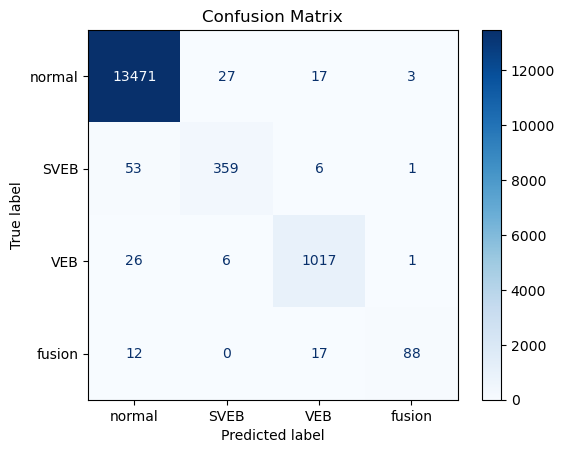

Classification Report:
              precision    recall  f1-score   support

      normal       0.99      1.00      0.99     13518
        SVEB       0.92      0.86      0.89       419
         VEB       0.96      0.97      0.97      1050
      fusion       0.95      0.75      0.84       117

    accuracy                           0.99     15104
   macro avg       0.95      0.89      0.92     15104
weighted avg       0.99      0.99      0.99     15104

Test Accuracy: 0.9888


In [2]:
#confusion matrix 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

# Define the label names as per your dataset
label_names = ['normal', 'SVEB', 'VEB', 'fusion']

# Get the true labels and predicted labels from the test set
y_true = np.load(os.path.join(test_dir, 'labels.npy'))  # Load the true labels from the test set
y_pred_probs = fusion_model.predict(test_generator)  # Get predictions from the model
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to predicted class labels

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
class_report = classification_report(y_true, y_pred, target_names=label_names)
print("Classification Report:")
print(class_report)

# Calculate and print accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
